<a href="https://www.kaggle.com/code/lukalafaye/moviesnote?scriptVersionId=201553331" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import torch
import numpy as np
import kagglehub
import torch.nn.functional as F
import matplotlib.pyplot as plt

genres = np.load(kagglehub.dataset_download('lukalafaye/movies', path='namesngenre.npy'))

train = np.load(kagglehub.dataset_download('lukalafaye/movies', path='ratings_train.npy'))

test = np.load(kagglehub.dataset_download('lukalafaye/movies', path='ratings_test.npy'))

In [2]:
trainrating = pd.DataFrame(train)
trainrating

,0,1,2,3,4,5,6,7,8,9,...,4970,4971,4972,4973,4974,4975,4976,4977,4978,4979
0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,2.5,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
testrating = pd.DataFrame(test)
testrating

,0,1,2,3,4,5,6,7,8,9,...,4970,4971,4972,4973,4974,4975,4976,4977,4978,4979
0,NaN,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
606,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
movie = pd.DataFrame(genres, columns=["title", "genres"])
movie = movie.reset_index()  # This will add the current index as a column
movie.rename(columns={'index': 'Id'}, inplace=True)  # Rename the new index column to 'Id'
movie.iloc[2670]

Id                   2670
title     Stroszek (1977)
genres       Comedy|Drama
Name: 2670, dtype: object

In [5]:
rating = trainrating.combine_first(testrating)
rating

,0,1,2,3,4,5,6,7,8,9,...,4970,4971,4972,4973,4974,4975,4976,4977,4978,4979
0,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,2.5,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
606,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
non_nan_counts_df = sum(rating.count())
non_nan_counts_df

63196

In [7]:
from math import isnan

# Step 2: Reset the index to keep track of user_id (row names)
rating_reset = rating.reset_index()

# Step 3: Use pd.melt to unpivot the dataframe, turning columns into rows
# This will give us columns: 'user_id' (index), 'movie_id' (column name), and 'rating'
melted_df = pd.melt(rating_reset, id_vars=['index'], var_name='movie_id', value_name='rating')

# Step 4: Drop NaN ratings
melted_df = melted_df.dropna(subset=['rating'])

# Step 5: Rename columns to user, movie, rating
melted_df = melted_df.rename(columns={'index': 'userId', 'movie_id': 'movieId'})

# Step 6: Check the result
melted_df

,userId,movieId,rating
0,0,0,4.0
4,4,0,4.0
14,14,0,2.5
16,16,0,4.5
18,18,0,4.0
...,...,...,...
3036641,61,4978,4.0
3036993,413,4978,3.5
3037093,513,4978,3.0
3037239,49,4979,3.0


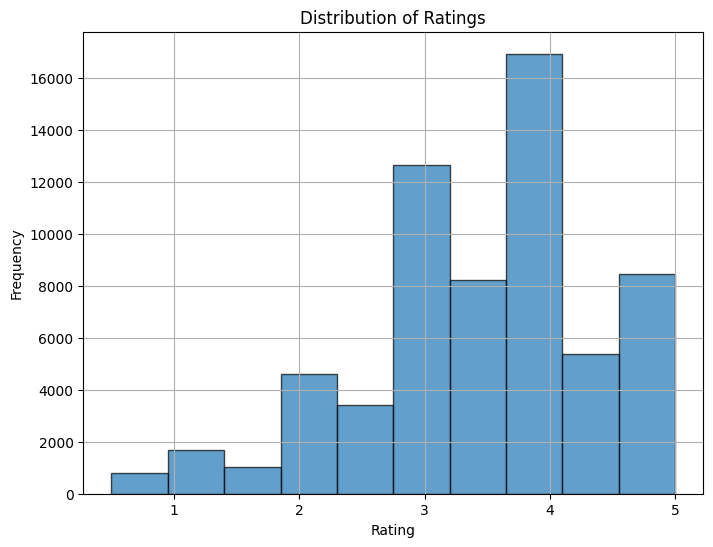

In [8]:
# Plotting the distribution of ratings
plt.figure(figsize=(8, 6))
plt.hist(melted_df['rating'], bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [9]:
valid_ratings = np.arange(0, 5.5, 0.5)  # Generates [0, 0.5, 1.0, ..., 5.0]

# Calculate the distribution of existing ratings
def calculate_distribution(df):
    # Count occurrences of each rating
    rating_counts = df['rating'].value_counts().reindex(valid_ratings, fill_value=0)
    # Calculate probabilities
    distribution = rating_counts / rating_counts.sum()
    return distribution

In [10]:
distribution = calculate_distribution(melted_df)
distribution

rating
0.0    0.000000
0.5    0.012896
1.0    0.026790
1.5    0.016441
2.0    0.073027
2.5    0.053833
3.0    0.199902
3.5    0.130151
4.0    0.267976
4.5    0.084879
5.0    0.134107
Name: count, dtype: float64

In [11]:
melted_df[melted_df["movieId"] == 4979]

,userId,movieId,rating
3037239,49,4979,3.0
3037569,379,4979,4.0


In [12]:
melted_df["movieId"] = pd.to_numeric(melted_df["movieId"])

user_rates_movie = torch.from_numpy(melted_df[["userId","movieId"]].transpose().values)
user_rates_movie_attr = torch.from_numpy(melted_df["rating"].values).float().view(len(melted_df))

In [13]:
user_rates_movie

tensor([[   0,    4,   14,  ...,  513,   49,  379],
        [   0,    0,    0,  ..., 4978, 4979, 4979]])

In [14]:
user_rates_movie_attr

tensor([4.0000, 4.0000, 2.5000,  ..., 3.0000, 3.0000, 4.0000])

In [15]:
user_features = torch.eye(len(melted_df['userId'].unique()))
user_features.shape

torch.Size([610, 610])

In [16]:
df = pd.read_csv(kagglehub.dataset_download('lukalafaye/movies', path='nicer.csv'))
df = df.sort_values(by='movieId', ascending=True).reset_index(drop=True)
df = df.sort_values(by='movieId', ascending=True).reset_index(drop=True).sample(frac=1).reset_index(drop=True)
df['Runtime'] = df['Runtime'].apply(lambda x: int(x.replace(' min', '')))
df.head()

,Unnamed: 0,movieId,Title,Year,Rated,Genre,imdbRating,imdbVotes,Language,Country,Plot,Runtime
0,4637,984,Mrs. Brown,1997,PG,"Biography, Drama, History",7.2,15633,English,"United Kingdom, Ireland, United States",When Queen Victoria's husband Prince Albert di...,101
1,2650,2838,Exodus,1960,Approved,"Action, Drama, War",6.7,11582,English,United States,"The State of Israel is created in 1948, result...",208
2,44,47,Home for the Holidays,1995,PG-13,"Comedy, Drama, Romance",6.6,14656,English,United States,"After losing her job, making out with her soon...",103
3,220,234,Star Trek: Generations,1994,PG,"Action, Adventure, Mystery",6.6,87732,"English, Klingon",United States,With the help of long presumed dead Captain Ki...,118
4,1114,1616,Lolita,1962,Approved,"Crime, Drama, Romance",7.5,110335,"English, French, Spanish, German","United Kingdom, United States",A middle-aged college professor becomes infatu...,153


In [17]:
genres = df['Genre'].str.get_dummies(',').values
genres = torch.from_numpy(genres).to(torch.float)
genres.shape

torch.Size([4980, 71])

In [18]:
current_year = 2024
bins = list(range(1900, current_year + 10, 10))  # Create bins from 1900 to 2024 in steps of 10 years
labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-1)]  # Labels for the buckets

# Categorize years into buckets
df['Year_Bucket'] = pd.cut(df['Year'], bins=bins, labels=labels, right=False)

# One-hot encode the year buckets
year_buckets = pd.get_dummies(df['Year_Bucket'])
year_buckets_tensor = torch.tensor(year_buckets.values, dtype=torch.float)
year_buckets_tensor.shape

torch.Size([4980, 13])

In [19]:
rated_onehot = pd.get_dummies(df["Rated"], prefix='Rated')
rated_onehot_tensor = torch.tensor(rated_onehot.values, dtype=torch.float)
rated_onehot_tensor.shape

torch.Size([4980, 20])

In [20]:
normalized_ratings = df['imdbRating'] / 10.0
imdb_ratings_tensor = torch.tensor(normalized_ratings.values, dtype=torch.float).view(-1, 1)
imdb_ratings_tensor.shape

torch.Size([4980, 1])

In [21]:
# Define the min and max values for the number of votes
min_votes = df['imdbVotes'].min()   # 7
max_votes = df['imdbVotes'].max()   # 2945396

# Define bucket ranges for imdbVotes (adjust as necessary)
vote_bins = [0, 100, 1000, 10000, 100000, 1000000, max_votes]
vote_labels = [f'{vote_bins[i]}-{vote_bins[i+1]-1}' for i in range(len(vote_bins)-1)]

# Use pd.cut to assign each movie into a vote bucket
df['vote_bucket'] = pd.cut(df['imdbVotes'], bins=vote_bins, labels=vote_labels, include_lowest=True)

# One-hot encode the vote buckets
votes_onehot = pd.get_dummies(df['vote_bucket'], prefix='Votes')

# Convert the one-hot encoded DataFrame to a PyTorch tensor
votes_onehot_tensor = torch.tensor(votes_onehot.values, dtype=torch.float)

# Check the shape of the tensor
votes_onehot_tensor.shape

torch.Size([4980, 6])

In [22]:
languages = df['Language'].str.get_dummies(',').values
languages = torch.from_numpy(languages).to(torch.float)
languages.shape

torch.Size([4980, 178])

In [23]:
countries = df['Country'].str.get_dummies(',').values
countries = torch.from_numpy(countries).to(torch.float)
countries.shape

torch.Size([4980, 139])

In [24]:
runtime_bins = [0, 30, 60, 90, 120, 680]  # You can adjust these bins as needed
runtime_labels = ['<30min', '30-60min', '60-90min', '90-120min', '>120min']

# Categorize runtimes into the defined bins
df['Runtime_Bucket'] = pd.cut(df['Runtime'], bins=runtime_bins, labels=runtime_labels, right=False)

# One-hot encode the runtime buckets
runtime_buckets = pd.get_dummies(df['Runtime_Bucket'])

# Convert to tensors if needed
runtime_buckets_tensor = torch.from_numpy(runtime_buckets.values).float()

runtime_buckets_tensor.shape

torch.Size([4980, 5])

In [25]:
movie_features = torch.cat([genres, year_buckets_tensor, rated_onehot_tensor, imdb_ratings_tensor, votes_onehot_tensor, languages, countries, runtime_buckets_tensor], dim=-1)

In [26]:
movie_features.shape

torch.Size([4980, 433])

In [27]:
movie_features = torch.load(kagglehub.dataset_download('lukalafaye/movies', path='tensor(1).pth'))

/tmp/ipykernel_30/1209102592.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  movie_features = torch.load(kagglehub.dataset_download('lukalafaye/movies', path='tensor(1).

In [28]:
movie_features.shape

torch.Size([4980, 946])

In [29]:
print(len(user_rates_movie_attr), len(user_features))

63196 610


In [30]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())

2.4.0
True


In [53]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Wed_Nov_22_10:17:15_PST_2023
Cuda compilation tools, release 12.3, V12.3.107
Build cuda_12.3.r12.3/compiler.33567101_0


In [52]:
!pip3 uninstall torch-geometric \
  torch-sparse \
  torch-scatter \
  torch-cluster \
  torch-cluster \
  pyg-lib -y

Found existing installation: pyg-lib 0.4.0+pt24cu124
Uninstalling pyg-lib-0.4.0+pt24cu124:
  Successfully uninstalled pyg-lib-0.4.0+pt24cu124


In [54]:
!pip install torch-geometric \
  torch-sparse \
  torch-scatter \
  torch-cluster \
  torch-cluster \
  pyg-lib \
  -f https://data.pyg.org/whl/torch-2.4.0+cu121.html

Looking in links: https://data.pyg.org/whl/torch-2.4.0+cu121.html
  Using cached torch_geometric-2.6.1-py3-none-any.whl.metadata (63 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 11.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 79.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 67.7 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 78.9 MB/s eta 0:00:00
Using cached torch_geometric-2.6.1-py3-none-any.whl (1.1 MB)


In [56]:
import pyg_lib

OSError: /opt/conda/lib/python3.10/site-packages/libpyg.so: undefined symbol: _ZNK5torch8autograd4Node4nameEv

In [44]:
import torch_geometric.transforms as T
from torch_geometric.data import HeteroData

# Create the heterogeneous graph data object:
data = HeteroData()

# Add the user nodes:
data['user'].x = user_features  # [num_users, num_features_users]

# Add the movie nodes:
data['movie'].x = movie_features  # [num_movies, num_features_movies]

# Add the rating edges:
data['user', 'rates', 'movie'].edge_index = user_rates_movie  # [2, num_ratings]

# Add the rating labels:
data['user', 'rates', 'movie'].edge_label = user_rates_movie_attr  # [num_ratings]

# We also need to make sure to add the reverse edges from movies to users
# in order to let a GNN be able to pass messages in both directions.
# We can leverage the `T.ToUndirected()` transform for this from PyG:
data = T.ToUndirected()(data)

# With the above transformation we also got reversed labels for the edges.
# We are going to remove them:
del data['movie', 'rev_rates', 'user'].edge_label

assert data['user'].num_nodes == len(user_features)
assert data['user', 'rates', 'movie'].num_edges == len(user_rates_movie_attr)
#assert data['movie'].num_features == 946

In [45]:
data

HeteroData(
  user={ x=[610, 610] },
  movie={ x=[4980, 946] },
  (user, rates, movie)={
    edge_index=[2, 63196],
    edge_label=[63196],
  },
  (movie, rev_rates, user)={ edge_index=[2, 63196] }
)

In [46]:
train_data, val_data, test_data = T.RandomLinkSplit(
    num_val=0.1,
    num_test=0.1,
    neg_sampling_ratio=0.0,
    edge_types=[('user', 'rates', 'movie')],
    rev_edge_types=[('movie', 'rev_rates', 'user')],
)(data)
train_data, val_data

(HeteroData(
   user={ x=[610, 610] },
   movie={ x=[4980, 946] },
   (user, rates, movie)={
     edge_index=[2, 50558],
     edge_label=[50558],
     edge_label_index=[2, 50558],
   },
   (movie, rev_rates, user)={ edge_index=[2, 50558] }
 ),
 HeteroData(
   user={ x=[610, 610] },
   movie={ x=[4980, 946] },
   (user, rates, movie)={
     edge_index=[2, 50558],
     edge_label=[6319],
     edge_label_index=[2, 6319],
   },
   (movie, rev_rates, user)={ edge_index=[2, 50558] }
 ))

In [47]:
from torch_geometric.loader import LinkNeighborLoader

# Define seed edges:
edge_label_index = train_data["user", "rates", "movie"].edge_label_index
edge_label = train_data["user", "rates", "movie"].edge_label

train_loader = LinkNeighborLoader(
    data=train_data,
    num_neighbors=[20, 10],
    neg_sampling_ratio=2.0,
    edge_label_index=(("user", "rates", "movie"), edge_label_index),
    edge_label=edge_label,
    batch_size=128,
    shuffle=True,
)

/opt/conda/lib/python3.10/site-packages/torch_geometric/sampler/neighbor_sampler.py:61: UserWarning: Using 'NeighborSampler' without a 'pyg-lib' installation is deprecated and will be removed soon. Please install 'pyg-lib' for accelerated neighborhood sampling
  warnings.warn(f"Using '{self.__class__.__name__}' without a "


In [48]:
from torch_geometric.nn import SAGEConv, to_hetero
import torch.nn.functional as F
from torch import Tensor

class GNN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        self.conv1 = SAGEConv(hidden_channels, hidden_channels)
        self.conv2 = SAGEConv(hidden_channels, hidden_channels)
    def forward(self, x: Tensor, edge_index: Tensor) -> Tensor:
        x = F.relu(self.conv1(x, edge_index))
        x = self.conv2(x, edge_index)
        return x
# Our final classifier applies the dot-product between source and destination
# node embeddings to derive edge-level predictions:
class Classifier(torch.nn.Module):
    def forward(self, x_user: Tensor, x_movie: Tensor, edge_label_index: Tensor) -> Tensor:
        # Convert node embeddings to edge-level representations:
        edge_feat_user = x_user[edge_label_index[0]]
        edge_feat_movie = x_movie[edge_label_index[1]]
        # Apply dot-product to get a prediction per supervision edge:
        return (edge_feat_user * edge_feat_movie).sum(dim=-1)

class Model(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        # Since the dataset does not come with rich features, we also learn two
        # embedding matrices for users and movies:
        self.movie_lin = torch.nn.Linear(20, hidden_channels)
        self.user_emb = torch.nn.Embedding(data["user"].num_nodes, hidden_channels)
        self.movie_emb = torch.nn.Embedding(data["movie"].num_nodes, hidden_channels)
        # Instantiate homogeneous GNN:
        self.gnn = GNN(hidden_channels)
        # Convert GNN model into a heterogeneous variant:
        self.gnn = to_hetero(self.gnn, metadata=data.metadata())
        self.classifier = Classifier()
    def forward(self, data: HeteroData) -> Tensor:
        x_dict = {
          "user": self.user_emb(data["user"].node_id),
          "movie": self.movie_lin(data["movie"].x) + self.movie_emb(data["movie"].node_id),
        } 
        # `x_dict` holds feature matrices of all node types
        # `edge_index_dict` holds all edge indices of all edge types
        x_dict = self.gnn(x_dict, data.edge_index_dict)
        pred = self.classifier(
            x_dict["user"],
            x_dict["movie"],
            data["user", "rates", "movie"].edge_label_index,
        )
        return pred
        
model = Model(hidden_channels=64)

In [41]:
import tqdm
import torch.nn.functional as F

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Device: '{device}'")
model = model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
for epoch in range(1, 6):
    total_loss = total_examples = 0
    for sampled_data in tqdm.tqdm(train_loader):
        optimizer.zero_grad()
        sampled_data.to(device)
        pred = model(sampled_data)
        ground_truth = sampled_data["user", "rates", "movie"].edge_label
        loss = F.binary_cross_entropy_with_logits(pred, ground_truth)
        loss.backward()
        optimizer.step()
        total_loss += float(loss) * pred.numel()
        total_examples += pred.numel()
    print(f"Epoch: {epoch:03d}, Loss: {total_loss / total_examples:.4f}")

OSError: /opt/conda/lib/python3.10/site-packages/libpyg.so: undefined symbol: _ZNK5torch8autograd4Node4nameEv

In [ ]:
from torch_geometric.nn import SAGEConv, to_hetero

class GNNEncoder(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        self.conv1 = SAGEConv((-1, -1), hidden_channels)
        self.dropout = torch.nn.Dropout(p=0.2)  # Add dropout layer
        self.leaky_relu = torch.nn.LeakyReLU(negative_slope=0.01)  # Set up Leaky ReLU

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = self.leaky_relu(x)  # Apply Leaky ReLU activation
        x = self.dropout(x)  # Apply dropout
        return x

class EdgeDecoder(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        self.lin1 = torch.nn.Linear(2 * hidden_channels, 1)
        self.leaky_relu = torch.nn.LeakyReLU(negative_slope=0.01)  # Set up Leaky ReLU

    def forward(self, z_dict, edge_label_index):
        row, col = edge_label_index
        user = 
        z = torch.cat([z_dict['user'][row], z_dict['movie'][col]], dim=-1)
        z = self.lin1(z)
        z = self.leaky_relu(z)  # Apply Leaky ReLU activation
        return z.view(-1)

class Model(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        self.encoder = GNNEncoder(hidden_channels)
        self.encoder = to_hetero(self.encoder, data.metadata(), aggr='mean')
        self.decoder = EdgeDecoder(hidden_channels)

    def forward(self, x_dict, edge_index_dict, edge_label_index):
        z_dict = self.encoder(x_dict, edge_index_dict)
        return self.decoder(z_dict, edge_label_index)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
train_data, val_data, test_data = T.RandomLinkSplit(
    num_val=0.1,
    num_test=0.1,
    neg_sampling_ratio=0.0,
    edge_types=[('user', 'rates', 'movie')],
    rev_edge_types=[('movie', 'rev_rates', 'user')],
)(data)
train_data, val_data

In [ ]:
train_data

In [ ]:
def predict_best_rating(predictions):
    # Round the predictions to the nearest valid ratings
    rounded_predictions = torch.round(predictions * 2) / 2
    return rounded_predictions

In [ ]:
import torch

# Assuming 'edge_label' contains the ratings in your train_data HeteroData object
ratings = train_data['user', 'movie'].edge_label

# Get unique ratings and their counts
unique_ratings, counts = torch.unique(ratings, return_counts=True)
unique_ratings
# Total samples for weight calculation
total_samples = counts.sum()

# Calculate weights as inverse of frequency
weights = {float(rating.item()): total_samples / count.item() for rating, count in zip(unique_ratings, counts)}
weights

In [ ]:
model = Model(hidden_channels=610).to(device)

# Initialize the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Lists to store the values for plotting
losses = []
train_rmses = []
val_rmses = []

def train():
    model.train()
    optimizer.zero_grad()
    pred = model(train_data.x_dict, train_data.edge_index_dict,
                 train_data['user', 'movie'].edge_label_index)
    target = train_data['user', 'movie'].edge_label
    # pred = round_to_half(pred)
    loss = F.mse_loss(pred, target)
    loss.backward()
    optimizer.step()
    return float(loss)

@torch.no_grad()
def test(data):
    data = data.to(device)
    model.eval()
    pred = model(data.x_dict, data.edge_index_dict,
                 data['user', 'movie'].edge_label_index)
    pred = pred.clamp(min=0, max=5)
    
    pred = predict_best_rating(pred)
    
    
    target = data['user', 'movie'].edge_label.float()
    rmse = F.mse_loss(pred, target).sqrt()
    return float(rmse)

# Training loop
for epoch in range(1, 400):
    train_data = train_data.to(device)
    loss = train()
    train_rmse = test(train_data)
    val_rmse = test(val_data)

    # Store the values for plotting
    losses.append(loss)
    train_rmses.append(train_rmse)
    val_rmses.append(val_rmse)

    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Train: {train_rmse:.4f}, '
          f'Val: {val_rmse:.4f}')

# Plotting the loss and RMSE
plt.figure(figsize=(12, 6))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(losses, label='Training Loss', color='blue')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot RMSE
plt.subplot(1, 2, 2)
plt.plot(train_rmses, label='Training RMSE', color='green')
plt.plot(val_rmses, label='Validation RMSE', color='red')
plt.title('RMSE Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import torch.nn.functional as F

with torch.no_grad():
    test_data = test_data.to(device)
    pred = model(test_data.x_dict, test_data.edge_index_dict,
                  test_data['user', 'movie'].edge_label_index)
    pred = pred.clamp(min=0, max=5)
    pred = predict_best_rating(pred)
    target = test_data['user', 'movie'].edge_label.float()

    # Calculate RMSE
    rmse = F.mse_loss(pred, target).sqrt()
    print(f'Test RMSE: {rmse:.4f}')

    # Convert to numpy arrays for easier manipulation
    userId = test_data['user', 'movie'].edge_label_index[0].cpu().numpy()
    movieId = test_data['user', 'movie'].edge_label_index[1].cpu().numpy()
    pred = pred.cpu().numpy()
    target = target.cpu().numpy()

    # Calculate exact accuracy
    correct_predictions = (pred == target).sum()  # Count exact matches
    accuracy = correct_predictions / len(target)  # Calculate accuracy

    print(f'Test Accuracy: {accuracy:.4f}')

    # Create a DataFrame for detailed predictions
    results_df = pd.DataFrame({
        'userId': userId,
        'movieId': movieId,
        'predicted_rating': pred,
        'target_rating': target
    })

In [ ]:
train_data, val_data, test_data = T.RandomLinkSplit(
    num_val=0,
    num_test=0,
    neg_sampling_ratio=0.0,
    edge_types=[('user', 'rates', 'movie')],
    rev_edge_types=[('movie', 'rev_rates', 'user')],
)(data)
train_data

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

model = Model(hidden_channels=610).to(device)

# Initialize the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Lists to store the values for plotting
losses = []
train_rmses = []
val_rmses = []

def train():
    model.train()
    optimizer.zero_grad()
    pred = model(train_data.x_dict, train_data.edge_index_dict,
                 train_data['user', 'movie'].edge_label_index)
    target = train_data['user', 'movie'].edge_label
    # pred = round_to_half(pred)
    loss = F.mse_loss(pred, target)
    loss.backward()
    optimizer.step()
    return float(loss)

@torch.no_grad()
def test(data):
    data = data.to(device)
    model.eval()
    pred = model(data.x_dict, data.edge_index_dict,
                 data['user', 'movie'].edge_label_index)
    pred = pred.clamp(min=0, max=5)
    pred = predict_best_rating(pred)
    target = data['user', 'movie'].edge_label.float()
    rmse = F.mse_loss(pred, target).sqrt()
    return float(rmse)

# Training loop
for epoch in range(1, 140):
    train_data = train_data.to(device)
    loss = train()
    train_rmse = test(train_data)

    # Store the values for plotting
    losses.append(loss)
    train_rmses.append(train_rmse)

    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Train: {train_rmse:.4f}')

# Plotting the loss and RMSE
plt.figure(figsize=(12, 6))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(losses, label='Training Loss', color='blue')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot RMSE
plt.subplot(1, 2, 2)
plt.plot(train_rmses, label='Training RMSE', color='green')
plt.title('RMSE Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Select movies that you haven't seen before
movies_rated = melted_df[melted_df['userId'] == 0]
len(movies_rated["movieId"].unique())

In [ ]:
movies_not_rated = melted_df[~melted_df.movieId.isin(movies_rated['movieId'])]["movieId"].unique() 
len(movies_not_rated)
movies_not_rated

In [ ]:
movie_ids = # Creates a tensor [0, 1, ..., 4979]
movie_ids

In [ ]:
import torch

# Define the number of users and movies
num_users = 610  # User IDs from 0 to 609

# Create user IDs and movie IDs
user_ids = torch.arange(num_users)  # Creates a tensor [0, 1, ..., 609]
movie_ids = torch.tensor(1) # Creates a tensor [0, 1, ..., 4979]

# Create all possible edges (user, movie) pairs
# Use meshgrid to create a grid of user and movie combinations
user_grid, movie_grid = torch.meshgrid(user_ids, movie_ids, indexing='ij')

# Stack the grids to create a shape of (2, num_edges)
edge_label_index = torch.stack((user_grid.flatten(), movie_grid.flatten()), dim=0)

# Check the shape of edge_label_index
print(edge_label_index.shape)  # Should be [2, num_edges], where num_edges = num_users * num_movies

torch.cuda.empty_cache()

with torch.no_grad():
    test_data.to(device)
    pred = model(train_data.x_dict, train_data.edge_index_dict, edge_label_index)
    pred = pred.clamp(min=0, max=5).detach().cpu()
    
predict_best_rating(pred) # first line

In [ ]:
import torch

# Define the number of users and movies
num_users = 610  # User IDs from 0 to 609
num_movies = 4980  # Movie IDs from 0 to 4979

# Create user IDs
user_ids = torch.arange(num_users)  # Creates a tensor [0, 1, ..., 609]

# Initialize a matrix to hold the ratings
ratings_matrix = torch.zeros(num_users, num_movies)  # Shape: [610, 4980]

# Move ratings_matrix to the appropriate device
ratings_matrix = ratings_matrix.to(device)

# Iterate over each movie and predict ratings
with torch.no_grad():
    for movie_id in range(num_movies):
        # Create a tensor for the specific movie ID
        movie_tensor = torch.tensor([movie_id]).to(device)  # Move to device
        
        # Create all possible edges (user, movie) pairs for the current movie
        user_grid = user_ids.repeat(1).to(device)  # Repeat user_ids
        movie_grid = movie_tensor.repeat(num_users).to(device)  # Repeat movie_tensor
        
        # Stack the grids to create the edge index for this movie
        edge_label_index = torch.stack((user_grid, movie_grid), dim=0)

        # Predict ratings for the current movie
        pred = model(train_data.x_dict, train_data.edge_index_dict, edge_label_index)
        
        # Clamp the predictions to ensure they are within the expected rating range
        pred = pred.clamp(min=0, max=5).detach().cpu()
        
        # Store predictions in the appropriate column of the ratings matrix
        ratings_matrix[:, movie_id] = pred.squeeze()  # Squeeze to ensure correct shape

# The ratings_matrix now contains predictions for all users across all movies
print(ratings_matrix.shape)  # Should be [610, 4980]

In [ ]:
final_preds = predict_best_rating(ratings_matrix)
final_preds = final_preds.cpu().numpy()

In [ ]:
np.save('final_preds.npy', final_preds_numpy)

In [ ]:
loaded_preds = np.load('final_preds.npy')
loaded_preds.shape